
# Project: Investigating the TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> In this project, the TMDb movie data was selected to perform data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

### 1.1 Attributes of dataset: 

* id
* imdb_id
* popularity
* budget
* revenue
* original_title
* cast
* homepage
* director
* tagline
* keywords
* overview
* runtime
* genres
* production_companies
* release_date
* vote_count
* vote_average
* release_year
* budget_adj
* revenue_adj

### 1.2 Questions about the dataset:
* Which genres are frequently occurred in movies?
* Which genres have higher popularity?
* Which genres make more profit? 
* Which genres have higher vote counts?
* Which movies have higher vote average over the year?


In [1]:
# Import packages and load dateset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

> In this section of the report, data set will be loaded, at the same time, check for cleanliness, and then trim and clean the  dataset for analysis.
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### 2.1 General Properties 

In [2]:
# Load your data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Assessing Data

* number of samples in dataset
* number of columns in dataset
* duplicate rows in dataset
* datatypes of columns
* features with missing values
* number of non-null unique values for features in dataset
* what those unique values are and counts for dataset

In [3]:
# number of samples and columns in dataset
df.shape

(10866, 21)

In [4]:
# number of duplicated rows in dataset
df.duplicated().sum()

1

In [5]:
# datatypes of columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# features of missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# number of non-null unique values for features 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### 2.2 Data Cleaning 

* Drop extraneous columns.

  > * Features aren't relevant to popularity and profitability of the movie will be removed       
  > * profit will be used in this analysis 
  
* Drop any rows contain missing values.

* Drop any rows contain duplicated values.

* Split data for columns 'genres', which contains multiple values seperated by (|) 


In [8]:
# Add in profit column 
df['profit'] = df['revenue'] - df['budget']

In [9]:
# Drop extraneous columns
df.drop(['id','imdb_id', 'cast','director','keywords', 'production_companies',
        'homepage','tagline','overview','release_date', 'revenue_adj','budget_adj'], 
        axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1316249360


In [10]:
# View missing value count for each feature
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
profit             0
dtype: int64

In [11]:
# Drop rows with any null values in dataset
df.dropna(inplace=True)

In [12]:
# Check if there is any null value
df.isnull().sum().any()

False

In [13]:
# Number of duplicates in dataset
df.duplicated().sum()

1

In [14]:
# Drop duplicates in dateset
df.drop_duplicates(inplace=True)

In [15]:
# Check if there is any duplicated value
df.duplicated().sum()

0

In [16]:
# Save cleaned dataset
df.to_csv('movie_data_cleaned.csv', index=False)

In [17]:
df = pd.read_csv('movie_data_cleaned.csv')
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1316249360


In [18]:
# Save splitted dataset
df.to_csv('movie_data_cleaned_splitted.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> Distribution of variables and 
  Descriptive statistics will be applied in this section to explore the trend and relationship between features in dataset.


In [19]:
df = pd.read_csv('movie_data_cleaned_splitted.csv')
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1316249360


In [20]:
# Group the dateset by year
group_1 = df.groupby(['release_year']).mean()
group_1.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
release_year,,,,,,,
1960,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,3.842127e+06
1961,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,9.405909e+06
1962,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,5.026804e+06
1963,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,3.355103e+06
1964,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,7.178539e+06


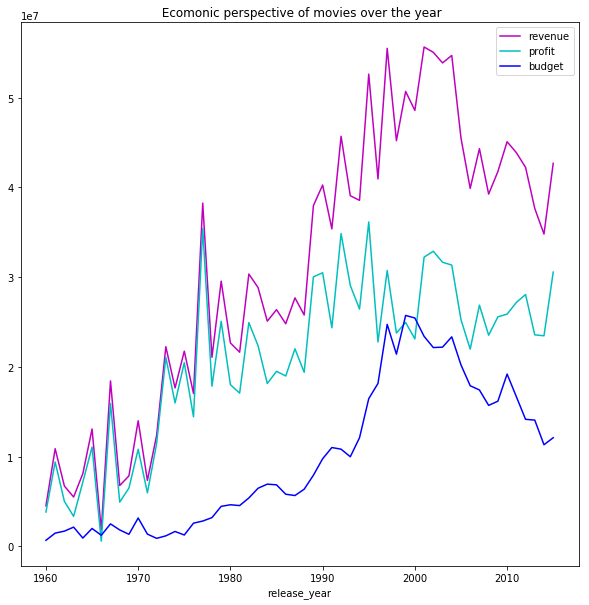

In [21]:
# Plot the annual revenue, profit and budget of movies in each year
group_1[['revenue','profit','budget']].plot(
    title = 'Ecomonic perspective of movies over the year',
    color=('m','c','b'),linestyle=('-'),figsize=(10, 10));

The graph above shows that revenue, budget and profit are rapidly 
increasing from 1960 to 2000, but after year 2000, the development of
movie industry slows down especially in terms of profitability, which 
could be caused by ecomonic turbulance happened during that period of time.

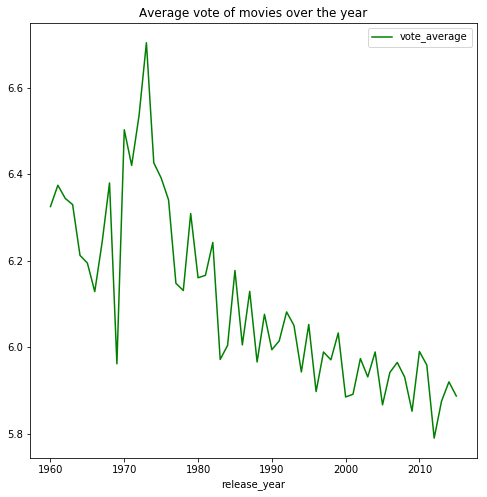

In [24]:
# Plot the trend of average vote score of movies in each year
group_1[['vote_average']].plot(title = 'Average vote of movies over the year',
        color=('g'),linestyle=('-'),figsize=(8, 8));

Supprisingly, the average vote score of movies reaches its peak at around
1972, but it starts to drop since then. Till 2010, average vote hits
its lowest value. This trend might explained by the increasing expectations from viewers. 

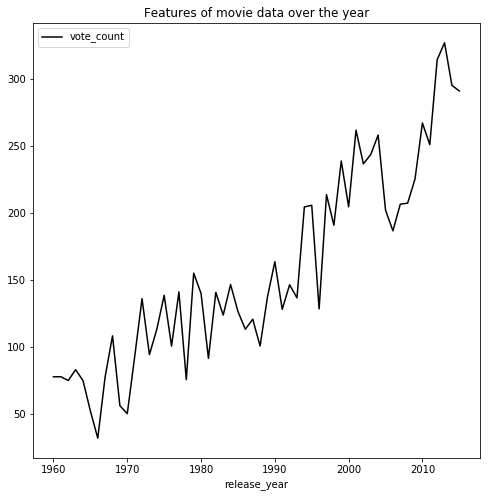

In [25]:
# Plot the trend of average vote score of movies in each year
group_1[['vote_count']].plot(title = 'Features of movie data over the year',
           color=('k'),linestyle=('-'),figsize=(8, 8));

Even though the vote average score is decreasing steadily over the year, 
more votes received from viewers, on the contrary, keeps on upwards tendency,
it could caused by technology enhancement and diversity in viewers' profile.

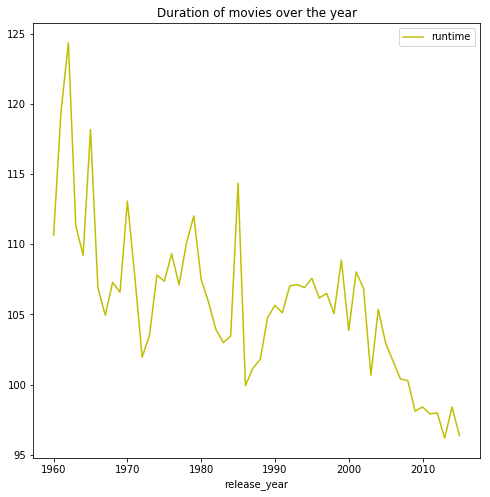

In [26]:
# Plot the trend of average vote score of movies in each year
group_1[['runtime']].plot(title = 'Duration of movies over the year',
           color=('y'),linestyle=('-'),figsize=(8, 8));

The duration of movies starts to decline since 1962, from highest `125min
to less than 100mins.

In [47]:
# Group release year by countint the number of movies made each year
group_2 = df.groupby(['release_year']).count()
group_2.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,profit
release_year,,,,,,,,,
1960,32,32,32,32,32,32,32,32,32
1961,31,31,31,31,31,31,31,31,31
1962,32,32,32,32,32,32,32,32,32
1963,34,34,34,34,34,34,34,34,34
1964,42,42,42,42,42,42,42,42,42


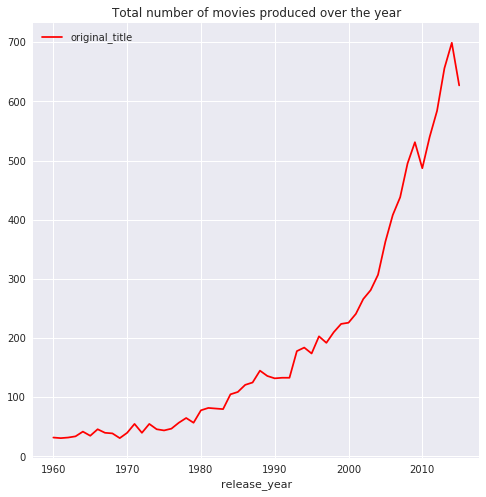

In [48]:
# Plot the number of movies made by each year 
group_2[['original_title']].plot(title = 'Total number of movies produced over the year',
           color=('r'),linestyle=('-'),figsize=(8, 8));

From the graph above, it illustrates that from 1960 to 1980, the total number of movies produced are rising slowly, however, from 1980 to 2000, the growth of movie industry seems promising and after 2000, the number of movies surges to its peak value. 

### Research Question 1 (Which genres are frequently occurred in movies?)

In [30]:
# Split multiple values in Genres column to extract more information about Genre
# Create a new datafreme with genres and counts
genre = df.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)
genre.head()

,Science Fiction,Thriller,Adventure,Action,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
genre_df = pd.DataFrame(genre.sum(axis=0), columns=['genre_count'])
genre_df['genres'] = genre_df.index
genre_df.head()

,genre_count,genres
Science Fiction,1229.0,Science Fiction
Thriller,2907.0,Thriller
Adventure,1471.0,Adventure
Action,2384.0,Action
Fantasy,916.0,Fantasy


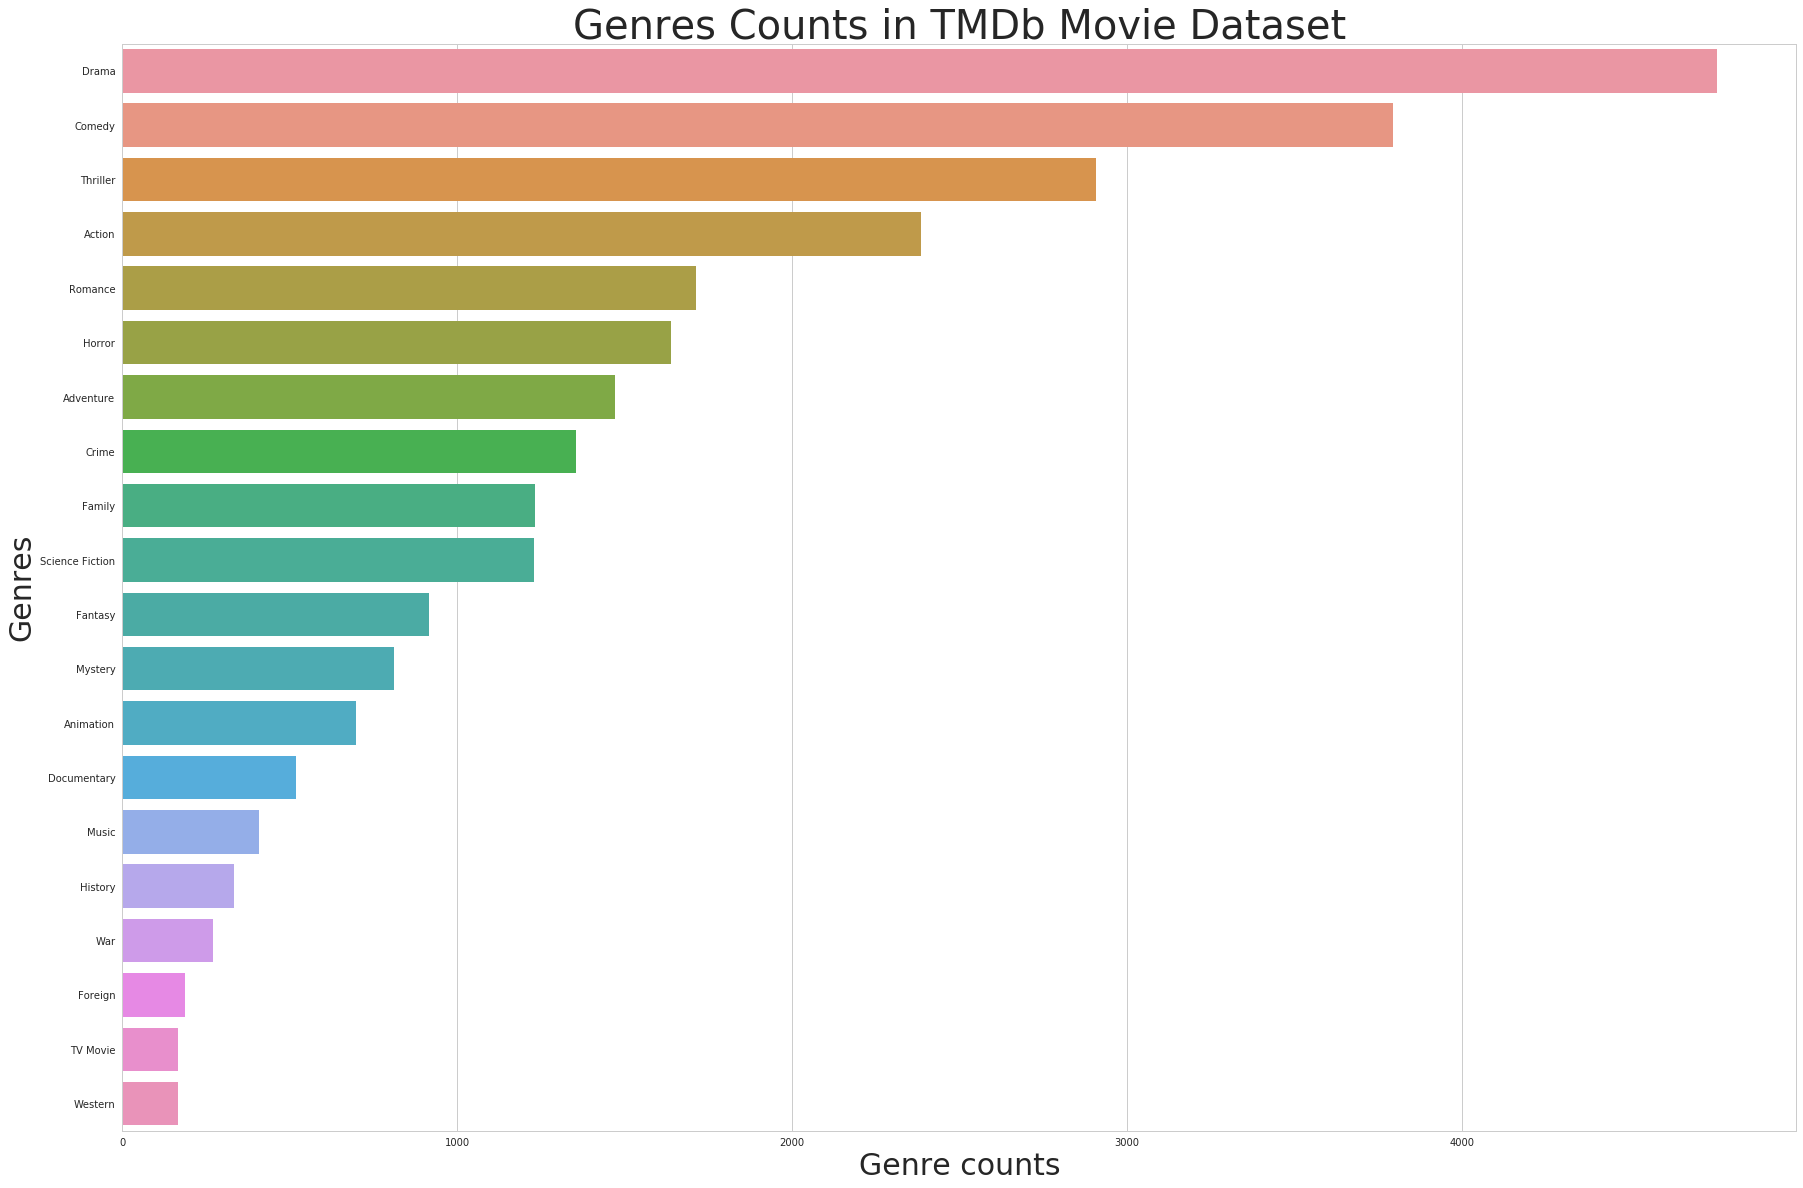

In [32]:
sns.set(style="whitegrid")
plt.subplots(figsize=(30,20))
# make barplot and sort bars
sns.barplot(y='genres', x='genre_count',data=genre_df,
            order=genre_df.sort_values('genre_count', 
            ascending=False).genres)
# Set labels
plt.xlabel("Genre counts", size=30)
plt.ylabel("Genres", size=30)
plt.title("Genres Counts in TMDb Movie Dataset", size=40);

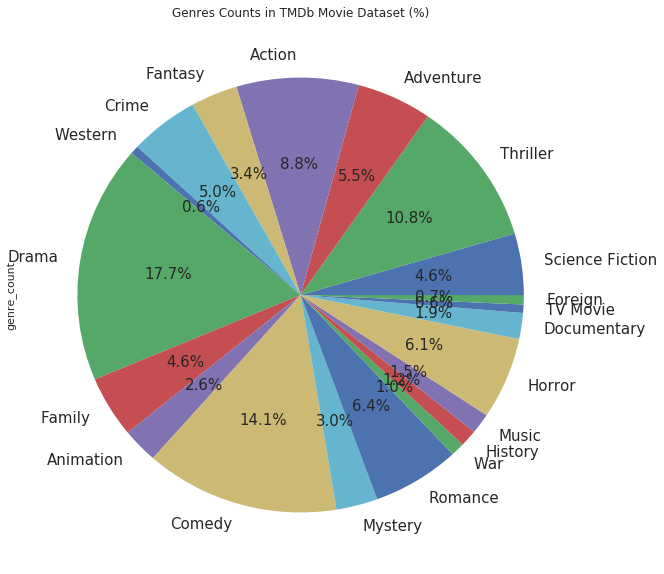

In [33]:
genre_df['genre_count'].plot.pie(title= 'Genres Counts in TMDb Movie Dataset (%)', figsize=(10,10), 
                                    autopct='%1.1f%%',fontsize=15);

Based on the bar plot and pie chart above, we can firstly tell that Drama, Comedy and Triller are most frequently occured genres in TMDb Movie Dataset, which followed by Action, Romance and Horror.

### Research Question 2  ( Which genres have higher popularity? )

In [34]:
# Get accumulated popularity score for each genres 
genre_pop_df = pd.DataFrame((np.matrix(df.popularity) * np.matrix(genre)).T, columns=['genre_pop'])
genre_pop_df['genres'] = genre_df.index
genre_pop_df.head()

,genre_pop,genres
0,1230.902062,Science Fiction
1,2155.723620,Thriller
2,1697.915054,Adventure
3,2208.238255,Action
4,909.441171,Fantasy


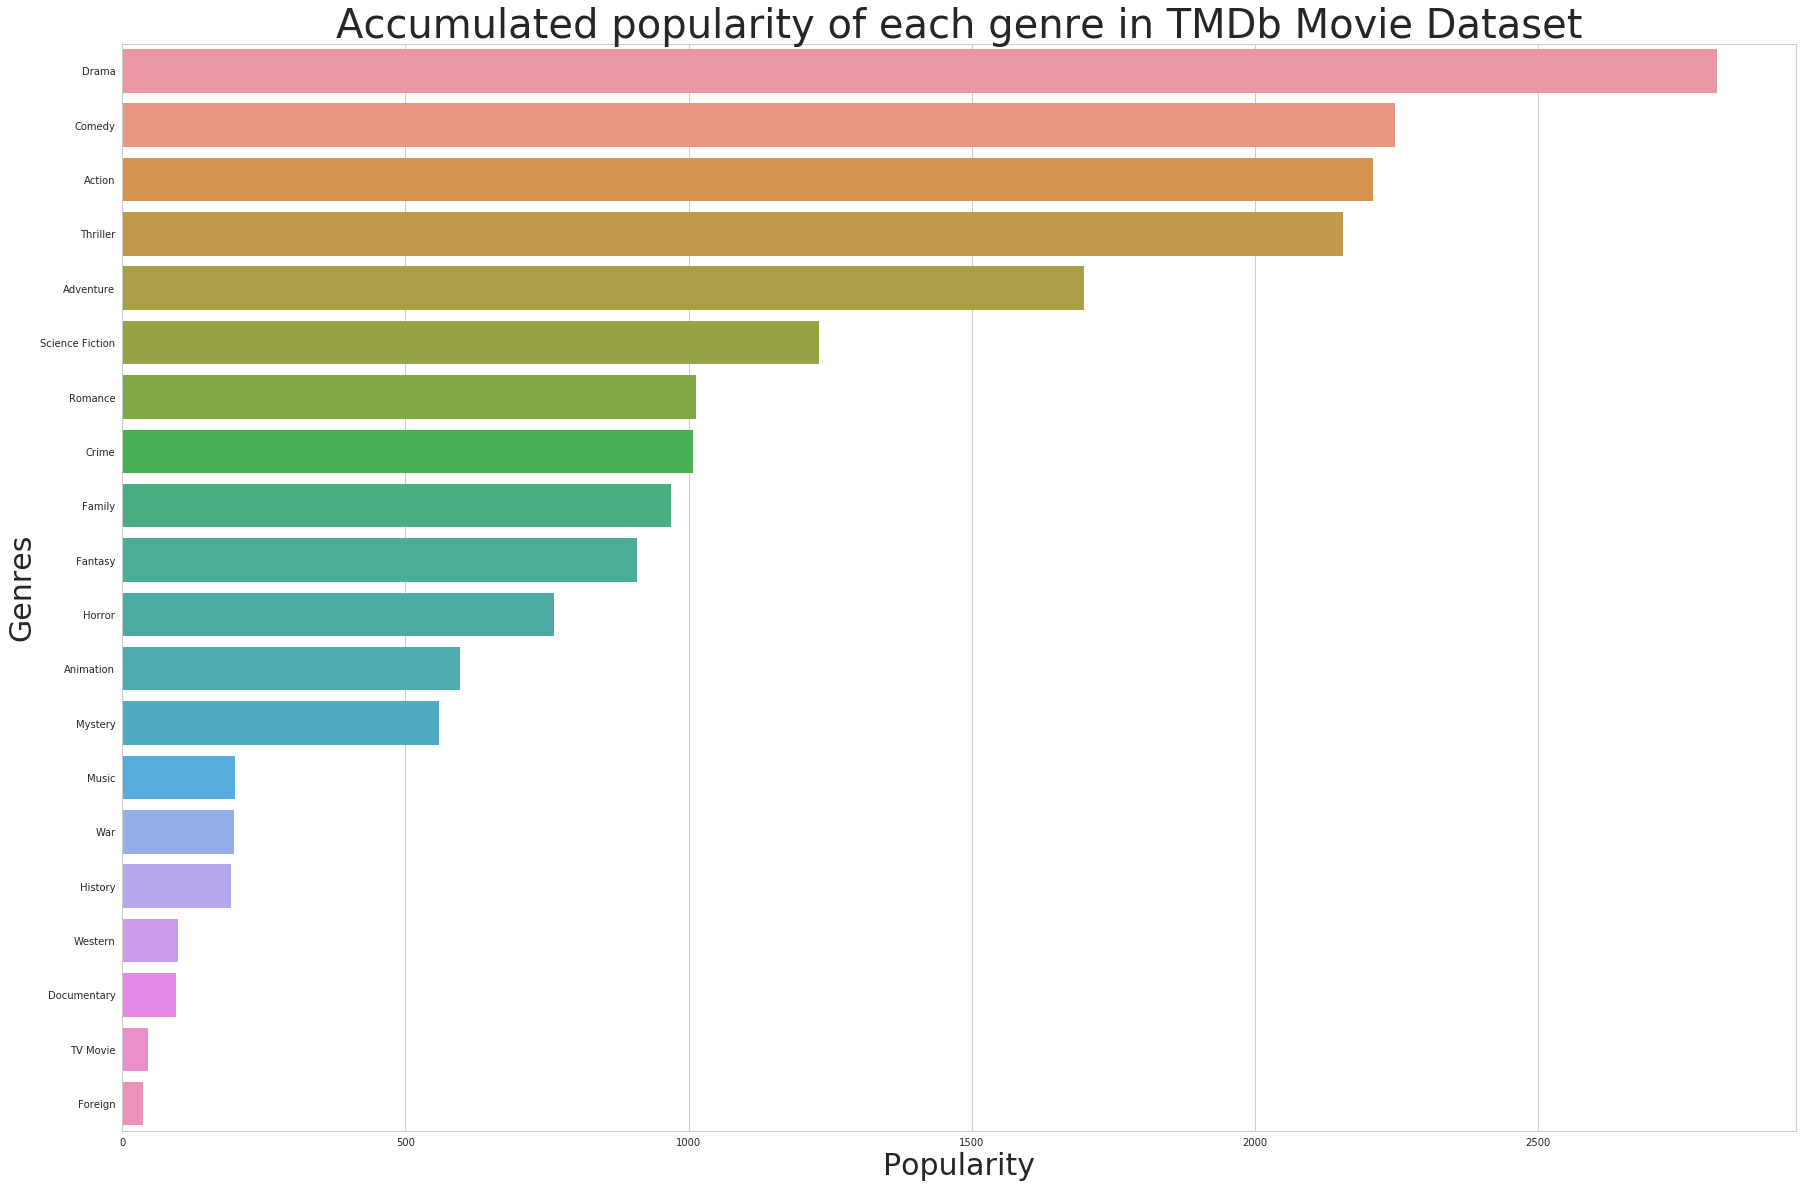

In [35]:
# Plot the relationship between genre and popularity in descending order
sns.set(style="whitegrid")
plt.subplots(figsize=(30,20))
# make barplot and sort bars
sns.barplot(y='genres', x='genre_pop',data=genre_pop_df,
            order=genre_pop_df.sort_values('genre_pop', 
            ascending=False).genres)
# Set labels
plt.xlabel("Popularity", size=30)
plt.ylabel("Genres", size=30)
plt.title("Accumulated popularity of each genre in TMDb Movie Dataset", size=40);

In terms of popularity, Drama, Comedy and Action movies are leading in chart, and followed by Triller, Adventure and Science Fiction. 

### Research Question 3  ( Which genres make more profit? )

In [36]:
# Get accumulated popularity score for each genres 
genre_pro_df = pd.DataFrame((np.matrix(df.profit) * np.matrix(genre)).T, columns=['genre_pro'])
genre_pro_df['genres'] = genre_df.index
genre_pro_df.head()

,genre_pro,genres
0,5.551132e+10,Science Fiction
1,7.128174e+10,Thriller
2,1.111990e+11,Adventure
3,1.074395e+11,Action
4,5.835018e+10,Fantasy


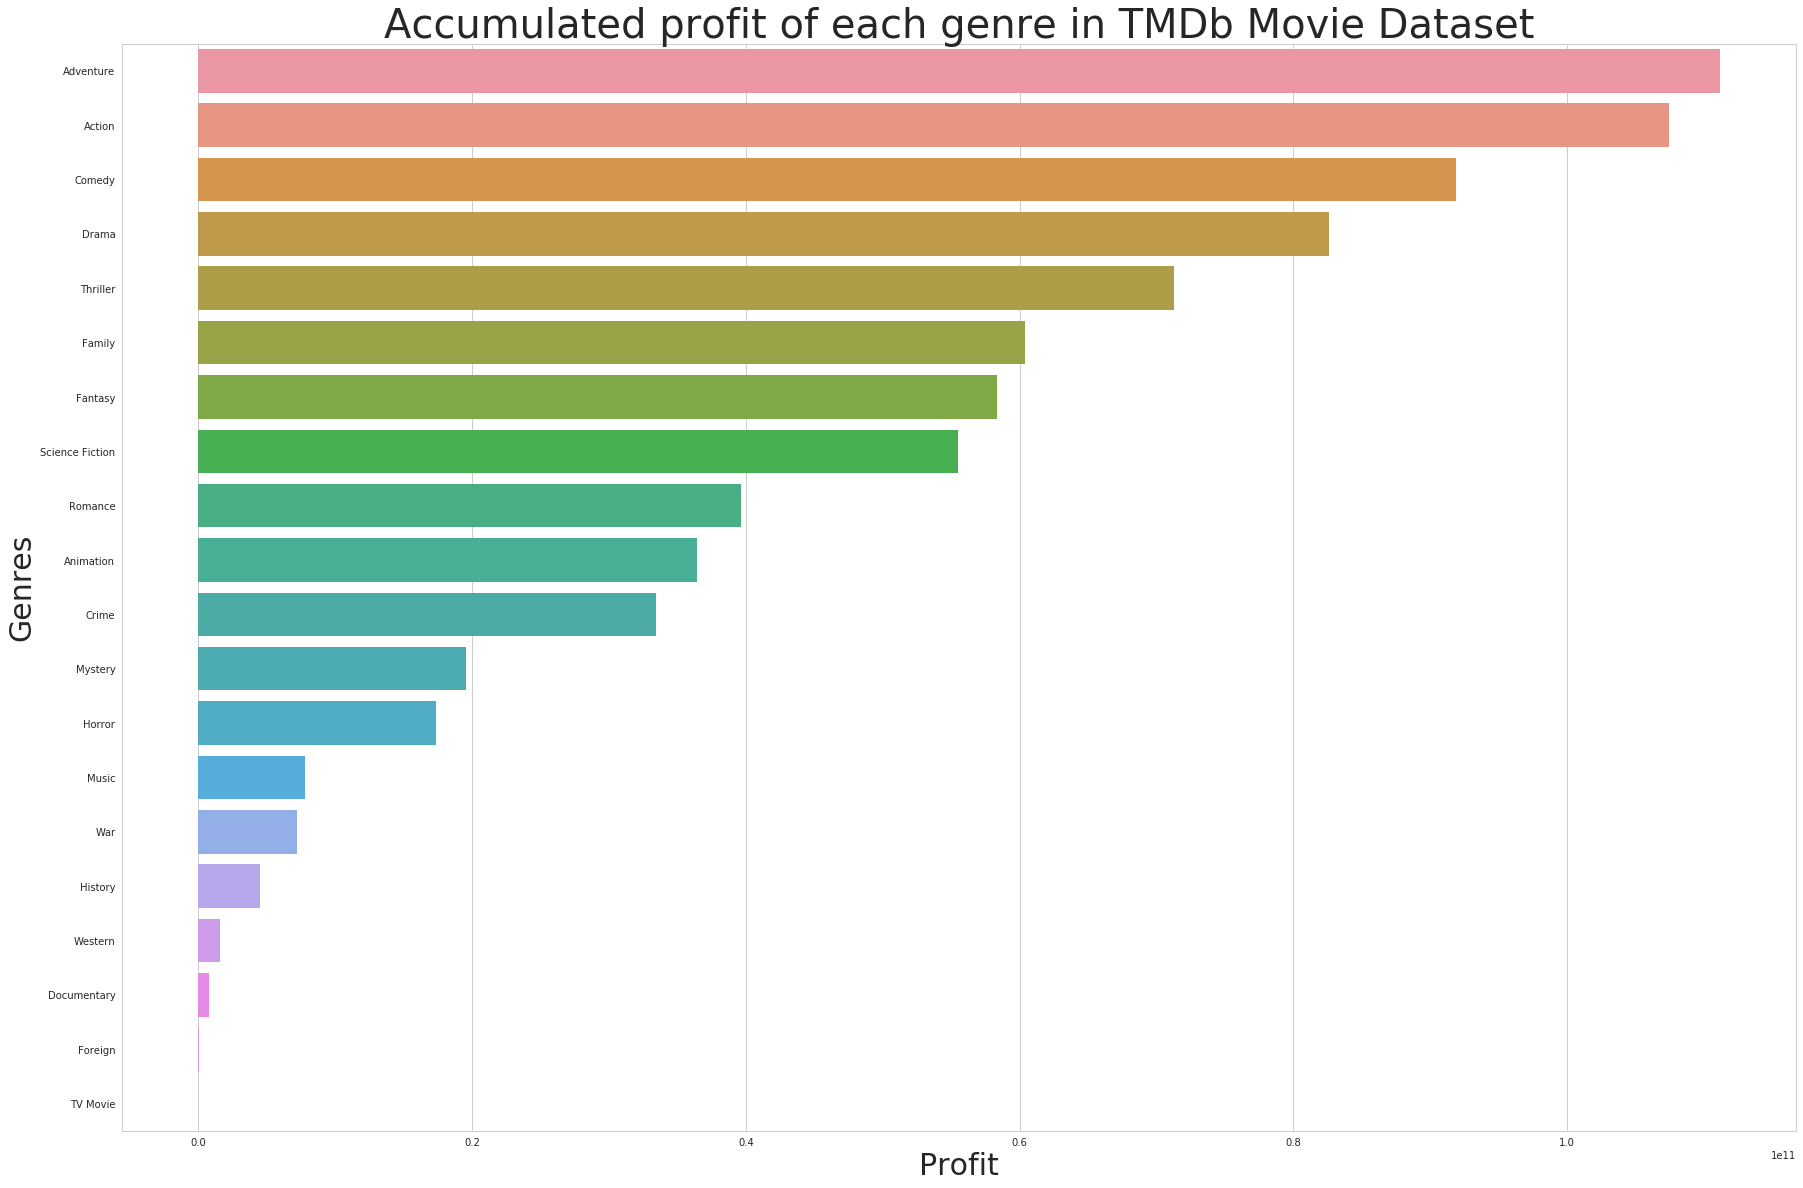

In [37]:
# Plot the relationship between genre and profit in descending order
sns.set(style="whitegrid")
plt.subplots(figsize=(30,20))
# make barplot and sort bars
sns.barplot(y='genres', x='genre_pro',data=genre_pro_df,
            order=genre_pro_df.sort_values('genre_pro', 
            ascending=False).genres)
# Set labels
plt.xlabel("Profit", size=30)
plt.ylabel("Genres", size=30)
plt.title("Accumulated profit of each genre in TMDb Movie Dataset", size=40);

Result from this chart states that Advanture, Action and Comedy produce relatively more profit comparing with other genres.

### Research Question 4  ( Which genres have higher vote counts?  )

In [38]:
# Get accumulated popularity score for each genres 
genre_vote_df = pd.DataFrame((np.matrix(df.vote_count) * np.matrix(genre)).T, columns=['genre_vote'])
genre_vote_df['genres'] = genre_df.index
genre_vote_df.head()

,genre_vote,genres
0,537191.0,Science Fiction
1,742693.0,Thriller
2,754807.0,Adventure
3,936897.0,Action
4,385399.0,Fantasy


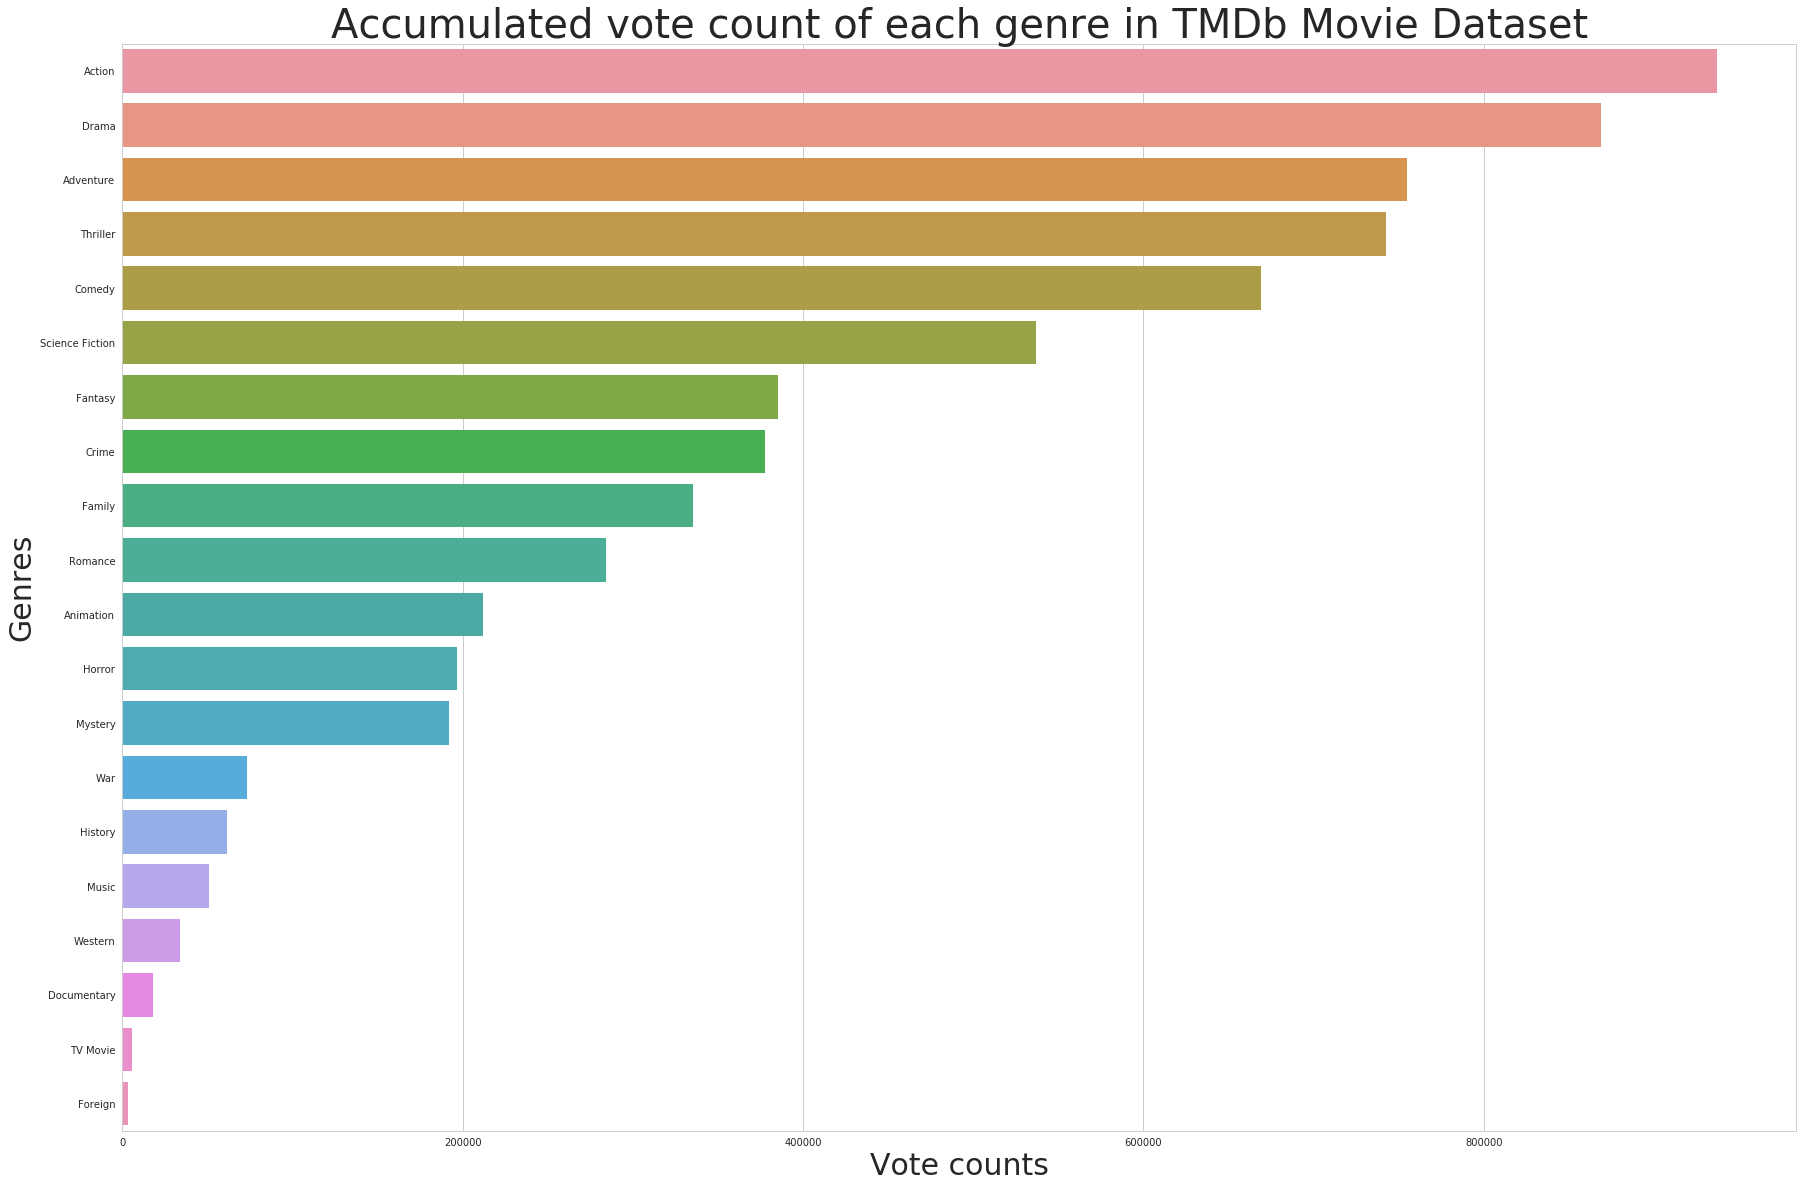

In [39]:
# Plot the relationship between genre and vote counts in descending order
sns.set(style="whitegrid")
plt.subplots(figsize=(30,20))
# make barplot and sort bars
sns.barplot(y='genres', x='genre_vote',data=genre_vote_df,
            order=genre_vote_df.sort_values('genre_vote', 
            ascending=False).genres)
# Set labels
plt.xlabel("Vote counts", size=30)
plt.ylabel("Genres", size=30)
plt.title("Accumulated vote count of each genre in TMDb Movie Dataset", size=40);

Action, Drama and Adventure movies received more vote counts from views, which follows by Thriller, Comedy and Science Ficture.

Meanwhile, some analysis on vote average and profitability of the movies has been done, it shows those movies with above median vote score of 6 perform well in profitability compares with movies with less than median vote score. 

In [40]:
df['vote_average'].median()

6.0

In [41]:
# select samples with vote less than the median and get mean
low_vote = df.query('vote_average < 6').mean().profit

# select samples with vote greater than or equal to the median and get mean
high_vote = df.query('vote_average >= 6').mean().profit

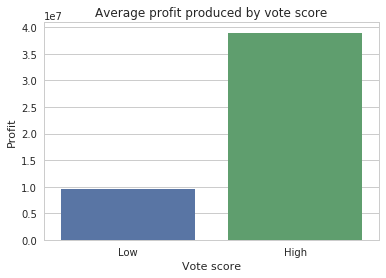

In [42]:
# Create a bar chart with proper labels
data = [low_vote, high_vote]
labels = ['Low', 'High']
sns.barplot(labels, data, tick_label=labels)
plt.title('Average profit produced by vote score')
plt.xlabel('Vote score')
plt.ylabel('Profit');

### Research Question 5  ( Which movies have higher vote average? )

In [43]:
movie_pop = pd.DataFrame(df.groupby(['release_year','original_title'])['vote_average'].mean())
movie_pop.sort_values(by='vote_average',ascending=False).head(10)

,,vote_average
release_year,original_title,
2011,The Story of Film: An Odyssey,9.2
2015,The Mask You Live In,8.9
2010,Life Cycles,8.8
2014,Black Mirror: White Christmas,8.8
2006,Pink Floyd: Pulse,8.7
2010,Opeth: In Live Concert At The Royal Albert Hall,8.6
2008,John Mayer: Where the Light Is Live in Los Angeles,8.5
1981,Queen - Rock Montreal,8.5
1995,A Personal Journey with Martin Scorsese Through American Movies,8.5


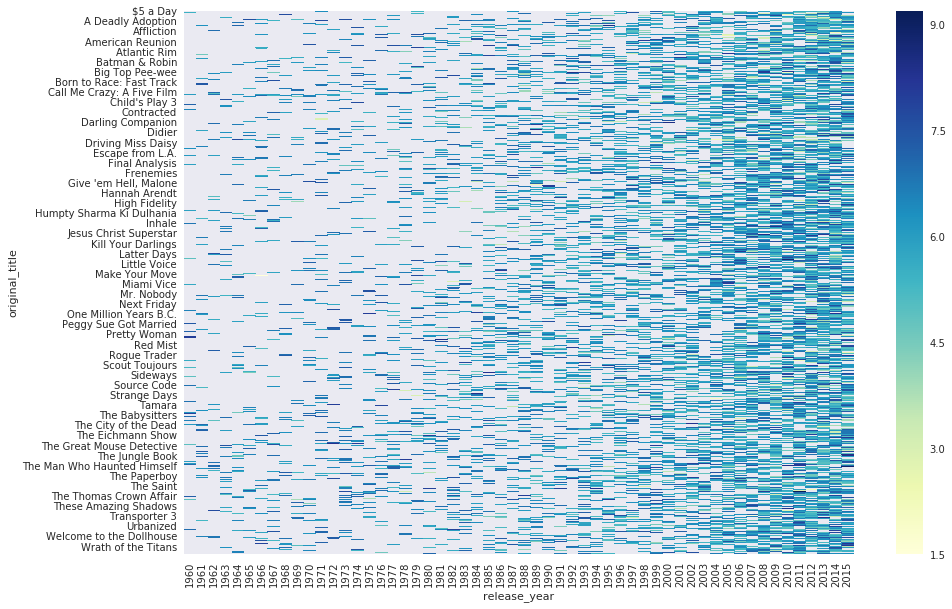

In [44]:
# Plot heatmap between vote average
movie_pop_pivot = pd.pivot_table(movie_pop, values='vote_average', index=['original_title'], columns=['release_year'])
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(movie_pop_pivot, cmap='YlGnBu');

It can be noticed from the list generated above, most of the high average vote score movies are produced after year 2000, and some of the movies are TV series, which could explain why they are made after year 2000. 

<a id='conclusions'></a>
## Conclusions

> **Limitations**: 
The hypotheses should be performed to further investigate the correlation and causal relationship between variables.


> **Findings**: 

The genre of movies should be selected if we are considering making a new movie. 

* Frequently occured: Drama, Comedy and Triller
* Popularity: Drama, Comedy and Action
* Profitability: Advanture, Action and Comedy
* Vote count: Action, Drama and Adventure

At the same time, we can watch the list of higher vote average movies as the reference before embarking on movie producing.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0